#Ok so that was some nasty code, here's a more readable version:

(Gen: #0) Total error: 2392.48567828

(Gen: #1) Total error: 311.795154816

(Gen: #2) Total error: 239.481842378

(Gen: #3) Total error: 106.005440241

(Gen: #4) Total error: 45.2453789328

Best Sol'n:
[[ 23.44515757  -2.32        -9.78      ]]
Cost:0.000138407123392
When X = 
[[0 1]
 [1 1]
 [0 0]
 [1 0]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]


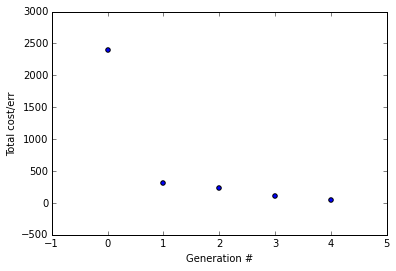

In [51]:
import matplotlib as plt
%matplotlib inline
import random as rn, numpy as np
import NeuralNet as NN
# [Init pop (pop=100), mut rate (=5%), num generations (250), chromosome/solution length (3), # winners/per gen]
initPop, mutRate, numGen, solLen, numWin = 100, 0.1, 5, 3, 10
#initialize current population to random values within range
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(initPop,solLen),replace=False) 
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((initPop, 2)) #1st col is indices, 2nd col is cost
for i in range(numGen): #iterate through num generations
    #Create vector of all errors from cost function for each solution
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].T))]) for x in range(initPop)])
	print("(Gen: #%s) Total error: %s\n" % (i, np.sum(fitVec[:,1])))
	plt.pyplot.scatter(i,np.sum(fitVec[:,1]))
	winners = np.zeros((numWin, solLen)) #20x3
	for n in range(len(winners)): #for n in range(10)
		selected = np.random.choice(range(len(fitVec)), numWin/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners #populate new gen with winners
	duplicWin = np.zeros((((initPop - len(winners))),winners.shape[1]))
	for x in range(winners.shape[1]): #for each col in winners (3 cols)
        #Duplicate winners (20x3 matrix) 3 times to create an 80x3 matrix, then shuffle columns
		numDups = ((initPop - len(winners))/len(winners)) #num times to duplicate, needs to fill rest of nextPop
		duplicWin[:, x] = np.repeat(winners[:, x], numDups, axis=0)#duplicate each col
		duplicWin[:, x] = np.random.permutation(duplicWin[:, x]) #shuffle each col ("crossover")
    #Populate the rest of the generation with offspring of mating pairs
	nextPop[len(winners):] = np.matrix(duplicWin)
    #Create a mutation matrix, mostly 1s, but some elements are random numbers from a normal distribution
	mutMatrix = [np.float(np.random.normal(0,2,1)) if rn.random() < mutRate else 1 for x in range(nextPop.size)]
    #randomly mutate part of the population by multiplying nextPop by our mutation matrix
	nextPop = np.multiply(nextPop, np.matrix(mutMatrix).reshape(nextPop.shape)) 
	curPop = nextPop
plt.pyplot.ylabel('Total cost/err')
plt.pyplot.xlabel('Generation #')
best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,1,1],[1,1,1],[0,0,1],[1,0,1]])
result = np.round(NN.runForward(X, best_soln.T))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.T))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))